In [1]:
# Data manipulation and analysis
import pandas as pd            # For working with tabular data (DataFrames)
import numpy as np             # For numerical operations and arrays

# Data visualization
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns            # For statistical and advanced visualizations

# Machine learning utilities
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets

# Regression models
from sklearn.linear_model import LinearRegression, Ridge  # Linear and Ridge regression models
from sklearn.tree import DecisionTreeRegressor            # Decision tree regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # For measuring model performance

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder           # For encoding categorical variables
from sklearn.feature_extraction.text import CountVectorizer  # For converting text into numerical features (Bag of Words)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [9]:
import io
movies_df = pd.read_csv((io.BytesIO(uploaded['movies.csv'])),encoding = 'unicode_escape')

Load data set

In [11]:
# The data has already been loaded in a previous cell (oyfqe5qhcFHn).
# The variable containing the DataFrame is movies_df.

# Quick preview of the loaded data
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [13]:
# Fill missing Ratings with median
movies_df['Rating'] = movies_df['Rating'].fillna(movies_df['Rating'].median())

# Replace missing Genre, Director, or Actors with 'Unknown'
movies_df[['Genre','Director','Actor 1', 'Actor 2', 'Actor 3']] = movies_df[['Genre','Director','Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')

#  Remove duplicates
df = movies_df.drop_duplicates()

# Check for missing values
df.isnull().sum()

,0
Name,0
Year,527
Duration,8264
Genre,0
Rating,0
Votes,7583
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [28]:
# Handle missing values in 'Year' before conversion
movies_df['Year'] = movies_df['Year'].str.replace(r'[()]', '', regex=True)

# Convert to numeric, coercing errors to NaN
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce')

# Impute missing 'Year' values with the median
median_year = movies_df['Year'].median()
movies_df['Year'] = movies_df['Year'].fillna(median_year)

# Now the 'Year' column is numeric (float) with no missing values

In [29]:
movies_df['Duration'] = pd.to_numeric(movies_df['Duration'].str.replace(' min', ''), errors='coerce')


In [33]:
# Ensure 'Genre' is string type and handle potential NaN before splitting
movies_df['Genre'] = movies_df['Genre'].astype(str)

# Split genres by comma and strip whitespace
movies_df['Genre'] = movies_df['Genre'].str.split(',').apply(lambda x: [item.strip() for item in x if item.strip()])

# Explode the list of genres into separate rows
movies_df = movies_df.explode('Genre')

# Replace empty strings that might result from splitting with NaN
movies_df['Genre'] = movies_df['Genre'].replace('', np.nan)


# Fill missing Genre with mode after exploding, with a fallback
genre_mode = movies_df['Genre'].mode()
if not genre_mode.empty:
    movies_df['Genre'] = movies_df['Genre'].fillna(genre_mode[0])
else:
    movies_df['Genre'] = movies_df['Genre'].fillna('Unknown') # Fallback if mode is empty

In [35]:
# Convert 'Votes' to numeric, removing commas and handling errors
movies_df['Votes'] = movies_df['Votes'].astype(str).str.replace(',', '', regex=False)
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'], errors='coerce')

# Impute missing 'Votes' values with the median
median_votes = movies_df['Votes'].median()
movies_df['Votes'] = movies_df['Votes'].fillna(median_votes)

# Now the 'Votes' column is numeric (float) with no missing values

In [36]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  float64
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.3+ MB


Exploratory Data Analysis (EDA)

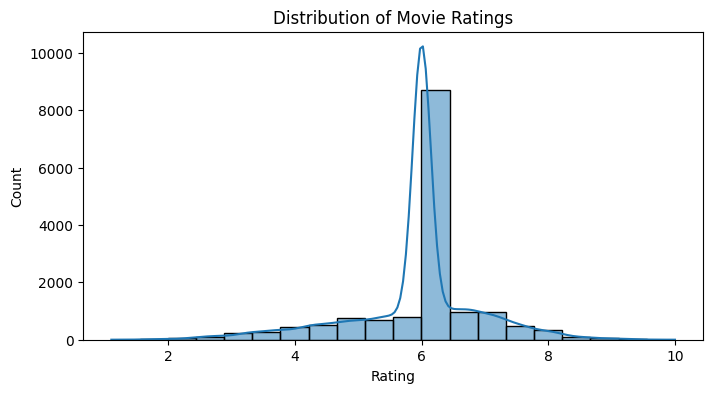

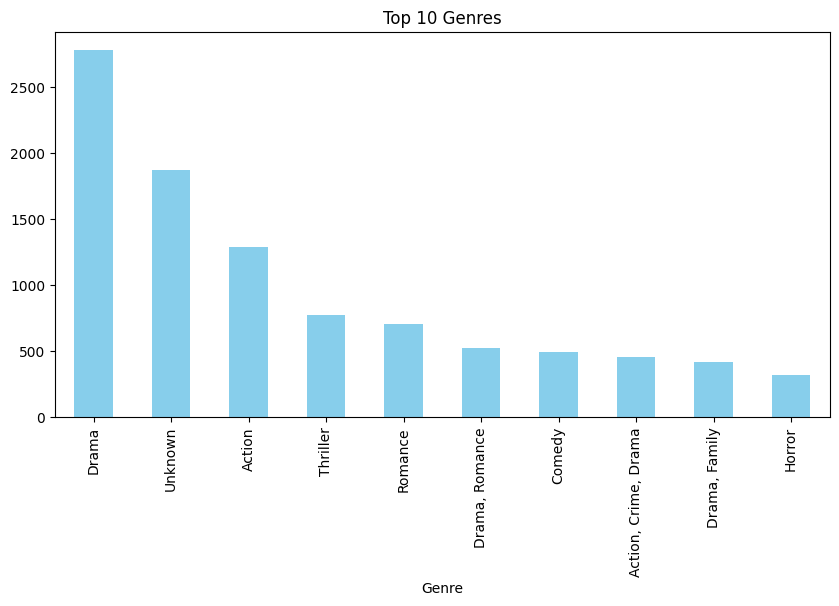

In [14]:
# Distribution of Ratings
plt.figure(figsize=(8,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.show()

# Top 10 genres
top_genres = df['Genre'].value_counts().head(10)
top_genres.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Genres")
plt.show()


In [41]:
import plotly.express as px

year = px.histogram(movies_df,x = 'Year', histnorm = 'probability density' , nbins = 30)

year.show()

In [44]:
#group data by year and calculate the average rating
avg_rate_year = movies_df.groupby(['Year','Genre'])['Rating'].mean().reset_index()
#get top 10 genere
top_10_genres = movies_df['Genre'].value_counts().head(10).index

In [45]:
#filtering data to include only  the top 3 genere
avg_rate_year = avg_rate_year[avg_rate_year['Genre'].isin(top_10_genres)]

In [46]:
#line plot by ploty Express
fig = px.line(avg_rate_year, x='Year', y='Rating', color='Genre', title='Average Rating by Year and Genre')
fig.show()

Feature Engineering

In [15]:
#split multiple genres
#create binary columns for each genre
genre_list = list(set([g for sublist in df['Genre'].str.split(',') for g in sublist]))
for genre in genre_list:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

/tmp/ipython-input-3369512448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)
/tmp/ipython-input-3369512448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)
/tmp/ipython-input-3369512448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [16]:
#Director average rating
director_ratings = df.groupby('Director')['Rating'].mean()
df['Director_Rating'] = df['Director'].map(director_ratings)

/tmp/ipython-input-1527576889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director_Rating'] = df['Director'].map(director_ratings)


In [19]:
#top actors features
from collections import Counter

# Create a copy to avoid SettingWithCopyWarning
df_copy = df.copy()

# Combine actor columns into a single list for each movie
df_copy['Actors_combined'] = df_copy[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ','.join(x.dropna()), axis=1)

actor_counts = Counter([actor.strip() for sublist in df_copy['Actors_combined'].str.split(',') for actor in sublist])
top_actors = [actor for actor,count in actor_counts.most_common(20)]

for actor in top_actors:
    df_copy[actor+'_actor'] = df_copy['Actors_combined'].apply(lambda x: 1 if actor in x else 0)

# Drop the combined actors column after creating features
df = df_copy.drop('Actors_combined', axis=1)

In [21]:
#prepare Training and Test Sets
X = df.drop(columns=['Name','Genre','Director','Rating'])
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [55]:
# ============================
# Preprocessing Pipeline
# ============================

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Work on a copy
data = df.copy()

# --- Handle Missing Values ---
# Assuming Rating is already handled based on previous successful cells
# data = data.dropna(subset=["Rating"])   # drop rows without target
data.fillna("Unknown", inplace=True)    # replace NaN in text columns

# --- Encode Director (Mean Encoding) ---
director_avg = data.groupby("Director")["Rating"].mean()
data["Director_avg_rating"] = data["Director"].map(director_avg)

# --- Encode Top Actors (One-Hot) ---
# Extract first 3 actors from original actor columns
data["Actors_combined"] = data[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ','.join(x.dropna()), axis=1)

# Flatten list to get frequency
from collections import Counter
actor_list = data["Actors_combined"].str.split(",").apply(lambda x: [a.strip() for a in x])
actor_freq = Counter([actor for sublist in actor_list for actor in sublist])

# Keep top 20 actors
top_actors = [a for a, c in actor_freq.most_common(20)]

for actor in top_actors:
    data[actor+"_actor"] = data["Actors_combined"].apply(lambda x: 1 if actor in x else 0)

# Drop the combined actors column after creating features
data = data.drop('Actors_combined', axis=1)

# --- Encode Genre (One-Hot) ---
# Assuming Genre is already handled based on previous successful cells which exploded the data
# If you want to re-encode genres here, you would need to adjust based on the exploded data structure
# For now, let's assume genre encoding is done elsewhere or not needed in this specific pipeline attempt.
# data = pd.get_dummies(data, columns=["Genre"], drop_first=True)

# --- Features & Target ---
# Drop original string actor columns and other non-numeric columns not intended as features
X = data.drop(columns=["Rating", "Name", "Director", 'Actor 1', 'Actor 2', 'Actor 3']) # remove non-numeric & target
y = data["Rating"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Preprocessing Done!")
print("Final Feature Columns:", X.columns.tolist()[:10], "...")

 Preprocessing Done!
Final Feature Columns: ['Year', 'Duration', 'Genre', 'Votes', 'Family', ' Drama', 'Romance', 'Drama', ' Sport', 'Thriller'] ...


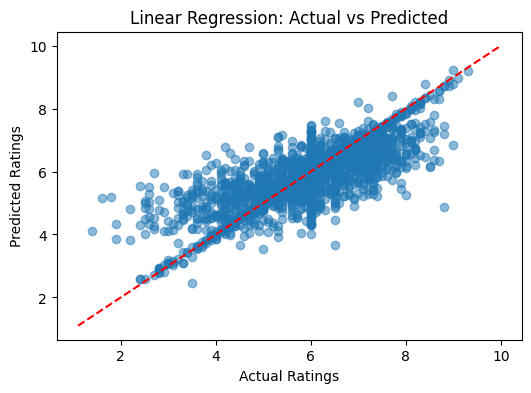

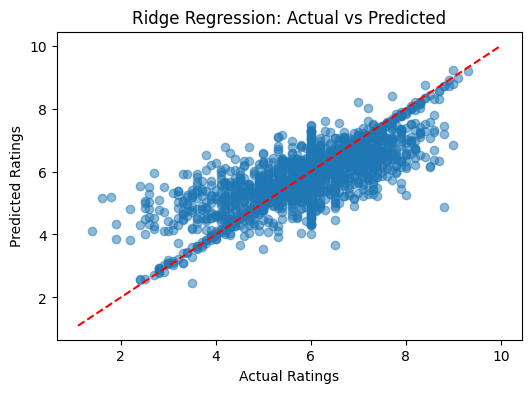

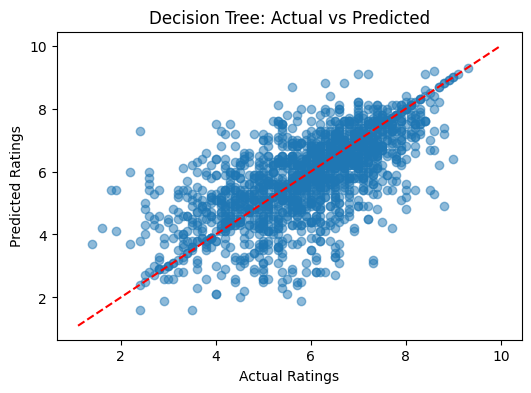

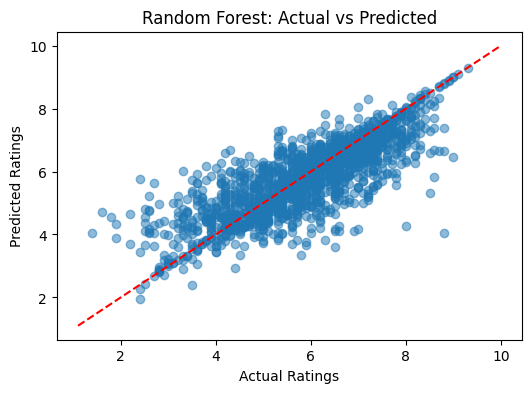

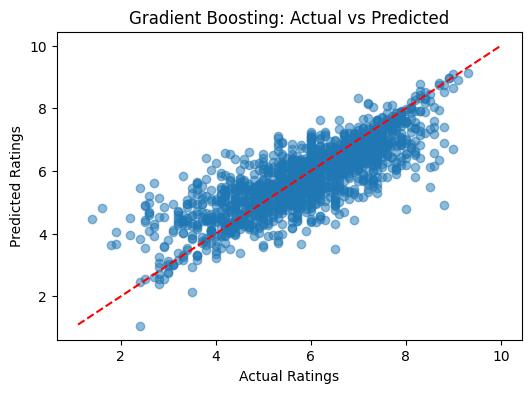

,RMSE,R2
Linear Regression,0.651320,0.566068
Ridge Regression,0.651261,0.566148
Decision Tree,0.820330,0.311649
Random Forest,0.598470,0.633633
Gradient Boosting,0.593100,0.640178


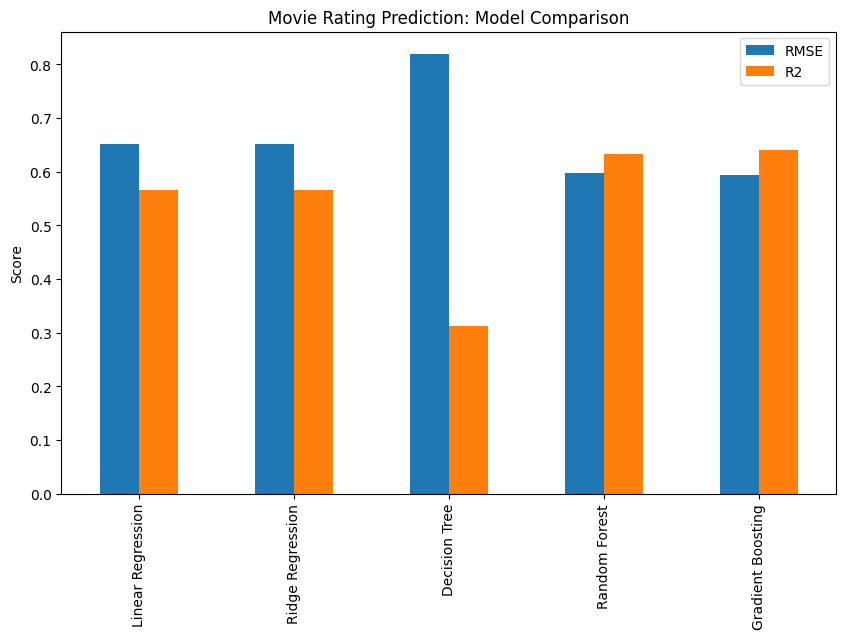

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined from a previous cell

# Preprocess 'Year', 'Duration', and 'Votes' columns
# Clean 'Year' column
X_train['Year'] = X_train['Year'].astype(str).str.replace(r'[()]', '', regex=True)
X_test['Year'] = X_test['Year'].astype(str).str.replace(r'[()]', '', regex=True)

# Convert to numeric, coercing errors to NaN
X_train['Year'] = pd.to_numeric(X_train['Year'], errors='coerce')
X_test['Year'] = pd.to_numeric(X_test['Year'], errors='coerce')

# Clean 'Duration' column
X_train['Duration'] = X_train['Duration'].astype(str).str.replace(' min', '', regex=False)
X_test['Duration'] = X_test['Duration'].astype(str).str.replace(' min', '', regex=False)

# Convert to numeric, coercing errors to NaN
X_train['Duration'] = pd.to_numeric(X_train['Duration'], errors='coerce')
X_test['Duration'] = pd.to_numeric(X_test['Duration'], errors='coerce')

# Clean 'Votes' column (remove commas)
X_train['Votes'] = X_train['Votes'].astype(str).str.replace(',', '', regex=False)
X_test['Votes'] = X_test['Votes'].astype(str).str.replace(',', '', regex=False)


# Convert to numeric, coercing errors to NaN
X_train['Votes'] = pd.to_numeric(X_train['Votes'], errors='coerce')
X_test['Votes'] = pd.to_numeric(X_test['Votes'], errors='coerce')


# Impute missing values with the median (or another suitable strategy)
for col in ['Year', 'Duration', 'Votes']:
    median_val = X_train[col].median() # Calculate median from training data
    X_train[col] = X_train[col].fillna(median_val)
    X_test[col] = X_test[col].fillna(median_val)

# Drop original actor columns if they exist (they are strings)
actor_cols_to_drop = [col for col in ['Actor 1', 'Actor 2', 'Actor 3'] if col in X_train.columns]
X_train = X_train.drop(columns=actor_cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=actor_cols_to_drop, errors='ignore')


#multi Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R2": r2}

    # Predicted vs Actual plot
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"{name}: Actual vs Predicted")
    plt.show()

# Results comparison
results_df = pd.DataFrame(results).T
display(results_df)

# Bar chart for comparison
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Movie Rating Prediction: Model Comparison")
plt.ylabel("Score")
plt.show()

tree based model


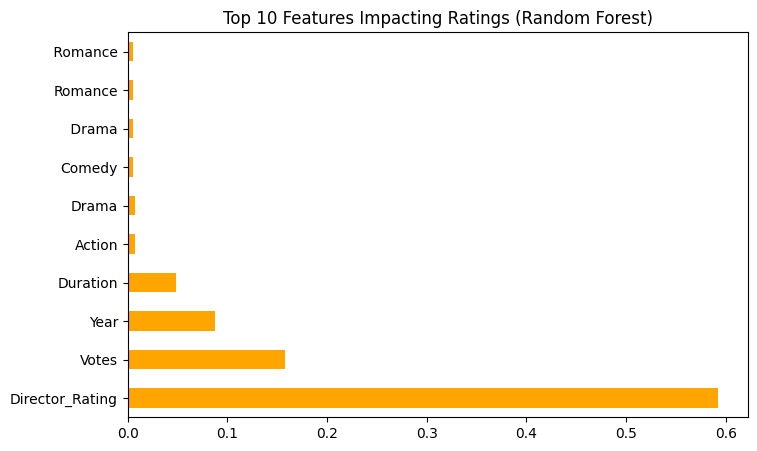

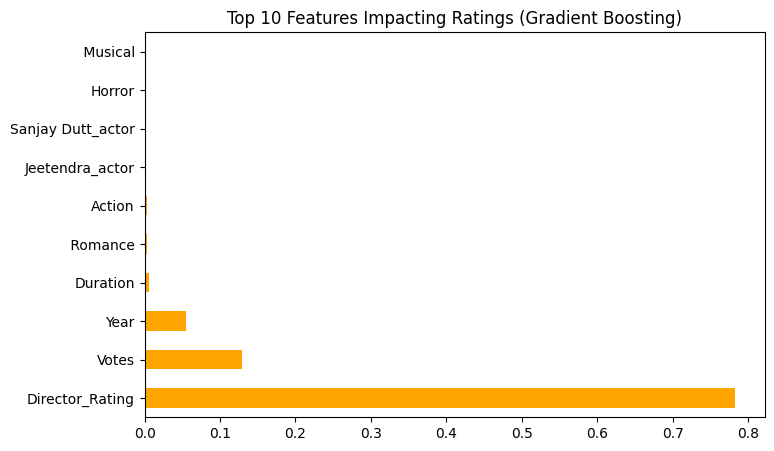

In [48]:
for name in ['Random Forest', 'Gradient Boosting']:
    model = models[name]
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False).head(10)

    plt.figure(figsize=(8,5))
    feat_imp.plot(kind='barh', color='orange')
    plt.title(f"Top 10 Features Impacting Ratings ({name})")
    plt.show()

In [51]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
X.head(10)

,Year,Duration,Genre,Votes,Family,Drama,Romance,Drama,Sport,Thriller,...,Master Bhagwan_actor,Sanjay Dutt_actor,Akshay Kumar_actor,Jackie Shroff_actor,Raj Babbar_actor,Sanjeev Kumar_actor,Helen_actor,Jeevan_actor,Pran_actor,Director_avg_rating
0,Unknown,Unknown,Drama,Unknown,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.850000
1,(2019),109 min,Drama,8,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,(2021),90 min,"Drama, Musical",Unknown,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
3,(2019),110 min,"Comedy, Romance",35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.400000
4,(2010),105 min,Drama,Unknown,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.285714
5,(1997),147 min,"Comedy, Drama, Musical",827,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.358824
6,(2005),142 min,"Drama, Romance, War","1,086",0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,7.500000
7,(2008),59 min,Documentary,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
8,(2012),82 min,"Horror, Mystery, Thriller",326,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.600000
9,(2014),116 min,"Action, Crime, Thriller",11,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000


In [75]:
y.head(10)

,Rating
0,6.0
1,7.0
2,6.0
3,4.4
4,6.0
5,4.7
6,7.4
7,6.0
8,5.6
9,4.0


In [76]:
data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]}
trail = pd.DataFrame(data)


In [83]:
def prepare_movie_features(new_movie, X_train, director_ratings):
    """
    Convert a new movie's data into a DataFrame with features matching X_train's columns.
    Ensures the output DataFrame has the exact same structure as X_train.

    Args:
        new_movie (dict): Info about the new movie (Year, Duration, Votes, Genre, Director, Actors).
        X_train (DataFrame): Training feature matrix used for model fitting.
        director_ratings (Series): Mapping of director -> average rating.

    Returns:
        DataFrame: A single row with features aligned to X_train.
    """

    # Initialize with zeros for all columns
    X_new = pd.DataFrame(0, index=[0], columns=X_train.columns)

    # --- Numeric features ---
    for col in ['Year', 'Duration', 'Votes']:
        if col in new_movie and col in X_train.columns:
            X_new.loc[0, col] = new_movie[col]
        elif col in X_train.columns:
            X_new.loc[0, col] = pd.to_numeric(X_train[col], errors='coerce').median()

    # --- Director average rating ---
    if 'Director_avg_rating' in X_train.columns:
        director = new_movie.get('Director')
        if director in director_ratings:
            X_new.loc[0, 'Director_avg_rating'] = director_ratings[director]
        else:
            X_new.loc[0, 'Director_avg_rating'] = pd.to_numeric(
                X_train['Director_avg_rating'], errors='coerce'
            ).median()

    # --- Genres (match dummy columns like "Genre_Action", "Genre_Comedy") ---
    if "Genre" in new_movie:
        for col in X_train.columns:
            if col.startswith("Genre_"):
                gname = col.replace("Genre_", "")
                if gname in new_movie["Genre"]:
                    X_new.loc[0, col] = 1

    # --- Actors (match top actor dummy features like "Tom Hanks_actor") ---
    if "Actors" in new_movie:
        for actor in new_movie["Actors"]:
            col = actor.strip() + "_actor"
            if col in X_train.columns:
                X_new.loc[0, col] = 1

    return X_new


In [84]:
# Single movie
new_movie = {
    'Year': 2023,
    'Duration': 150,
    'Votes': 1200,
    'Genre': ['Action', 'Sci-Fi'],
    'Director': 'Christopher Nolan',
    'Actors': ['Leonardo DiCaprio', 'Tom Hardy']
}

# Multiple movies
new_movies = [
    {
        'Year': 2019,
        'Duration': 130,
        'Votes': 800,
        'Genre': ['Drama', 'Romance'],
        'Director': 'Greta Gerwig',
        'Actors': ['Saoirse Ronan', 'Timothée Chalamet']
    },
    {
        'Year': 2021,
        'Duration': 180,
        'Votes': 2000,
        'Genre': ['Action', 'Adventure'],
        'Director': 'Denis Villeneuve',
        'Actors': ['Timothée Chalamet', 'Zendaya']
    }
]


In [86]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Store results in DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                         R2      RMSE
Linear Regression  0.036245  0.970660
Ridge Regression   0.036249  0.970658
Decision Tree     -0.213466  1.089175
Random Forest      0.125804  0.924460
Gradient Boosting  0.140851  0.916470


In [87]:
# Select the model with highest R² score
best_model_name = results_df["R2"].idxmax()
best_model = models[best_model_name]

print(f"✅ Best model is: {best_model_name}")


✅ Best model is: Gradient Boosting


In [88]:
def predict_new_movie_rating(new_movie, best_model, X_train, director_ratings):
    X_new = prepare_movie_features(new_movie, X_train, director_ratings)
    rating_pred = best_model.predict(X_new)[0]
    return rating_pred

# Usage
predicted = predict_new_movie_rating(new_movie, best_model, X_train, director_ratings)
print(f"🎬 Predicted Rating: {predicted:.2f}")


🎬 Predicted Rating: 5.67
